In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Importing the Data sets

In [53]:
data1 = pd.read_csv("../pizza_sales/order_details.csv")
data2 = pd.read_csv("../pizza_sales/orders.csv")
data3 = pd.read_csv("../pizza_sales/Pizza_Types.csv", encoding="latin-1")
data4 = pd.read_csv("../pizza_sales/pizzas.csv")

### Using Merge Function to Join datasets

In [54]:
data5 = pd.merge(data1, data2, left_on="order_details_id", how="inner", right_on="order_id")

In [55]:
data5.head()

,order_details_id,order_id_x,pizza_id,quantity,order_id_y,date,time
0,1,1,hawaiian_m,1,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,3,2015-01-01,12:12:28
3,4,2,ital_supr_l,1,4,2015-01-01,12:16:31
4,5,2,mexicana_m,1,5,2015-01-01,12:21:30


In [56]:
data4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [57]:
data6 = pd.merge(data5, data4, on="pizza_id")

In [58]:
data6.head()

,order_details_id,order_id_x,pizza_id,quantity,order_id_y,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,3,2015-01-01,12:12:28,five_cheese,L,18.50
3,4,2,ital_supr_l,1,4,2015-01-01,12:16:31,ital_supr,L,20.75
4,5,2,mexicana_m,1,5,2015-01-01,12:21:30,mexicana,M,16.00


In [59]:
data3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [60]:
data = pd.merge(data6, data3, on="pizza_type_id")

In [61]:
data.head()

,order_details_id,order_id_x,pizza_id,quantity,order_id_y,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,3,2015-01-01,12:12:28,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,4,2015-01-01,12:16:31,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,5,2015-01-01,12:21:30,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


### Dropping duplicate columns

In [62]:
data.drop("order_id_x", axis=1, inplace=True)

In [63]:
data.drop("order_id_y", axis=1, inplace=True)

In [64]:
data.drop("pizza_type_id", axis=1, inplace=True)

In [65]:
data.duplicated().sum()

np.int64(0)

### Data Cleaning

In [66]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients
0,1,hawaiian_m,1,2015-01-01,11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,classic_dlx_m,1,2015-01-01,11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,five_cheese_l,1,2015-01-01,12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,ital_supr_l,1,2015-01-01,12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,mexicana_m,1,2015-01-01,12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [67]:
data.info() # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  21350 non-null  int64  
 1   pizza_id          21350 non-null  object 
 2   quantity          21350 non-null  int64  
 3   date              21350 non-null  object 
 4   time              21350 non-null  object 
 5   size              21350 non-null  object 
 6   price             21350 non-null  float64
 7   name              21350 non-null  object 
 8   category          21350 non-null  object 
 9   ingredients       21350 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.6+ MB


In [68]:
data.isna().sum()  # Checking for null values

order_details_id    0
pizza_id            0
quantity            0
date                0
time                0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [69]:
data["date"] = pd.to_datetime(data["date"]) #Changing the date data type

In [70]:
data["time"] = pd.to_timedelta(data["time"]) #Changine the time data type

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_details_id  21350 non-null  int64          
 1   pizza_id          21350 non-null  object         
 2   quantity          21350 non-null  int64          
 3   date              21350 non-null  datetime64[ns] 
 4   time              21350 non-null  timedelta64[ns]
 5   size              21350 non-null  object         
 6   price             21350 non-null  float64        
 7   name              21350 non-null  object         
 8   category          21350 non-null  object         
 9   ingredients       21350 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 1.6+ MB


In [72]:
data["pizza_id"].value_counts()

pizza_id
big_meat_s        795
five_cheese_l     613
four_cheese_l     571
thai_ckn_l        570
spicy_ital_l      490
                 ... 
mexicana_s         62
calabrese_s        47
green_garden_l     44
ckn_alfredo_s      40
the_greek_xxl      15
Name: count, Length: 91, dtype: int64

In [73]:
data["name"].value_counts()

name
The Barbecue Chicken Pizza                    1093
The Pepperoni Pizza                           1052
The Classic Deluxe Pizza                      1033
The Hawaiian Pizza                            1022
The California Chicken Pizza                   998
The Thai Chicken Pizza                         983
The Four Cheese Pizza                          846
The Italian Supreme Pizza                      830
The Sicilian Pizza                             818
The Spicy Italian Pizza                        818
The Southwest Chicken Pizza                    817
The Big Meat Pizza                             795
The Vegetables + Vegetables Pizza              690
The Spinach and Feta Pizza                     644
The Greek Pizza                                631
The Italian Capocollo Pizza                    628
The Pepper Salami Pizza                        626
The Mexicana Pizza                             615
The Prosciutto and Arugula Pizza               614
The Five Cheese Pizza     

In [74]:
data["category"].value_counts()

category
Classic    6353
Supreme    5161
Veggie     5101
Chicken    4735
Name: count, dtype: int64

In [75]:
data["ingredients"].value_counts()

ingredients
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  1093
Mozzarella Cheese, Pepperoni                                                                         1052
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 1033
Sliced Ham, Pineapple, Mozzarella Cheese                                                             1022
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                   998
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                    983
Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic     846
Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic                               830
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                      818
Capocollo, Tomatoes, Goat Cheese, 

## 1. Total Revenue Sales

In [76]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients
0,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,five_cheese_l,1,2015-01-01,0 days 12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,ital_supr_l,1,2015-01-01,0 days 12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,mexicana_m,1,2015-01-01,0 days 12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [77]:
data["Sales"] = data["quantity"] * data["price"]

In [78]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients,Sales
0,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,five_cheese_l,1,2015-01-01,0 days 12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,ital_supr_l,1,2015-01-01,0 days 12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,mexicana_m,1,2015-01-01,0 days 12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [79]:
data.tail()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients,Sales
21345,21346,five_cheese_l,1,2015-12-31,0 days 20:51:07,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
21346,21347,ital_supr_l,1,2015-12-31,0 days 21:14:37,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
21347,21348,classic_dlx_l,1,2015-12-31,0 days 21:23:10,L,20.50,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",20.50
21348,21349,five_cheese_l,1,2015-12-31,0 days 22:09:54,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
21349,21350,peppr_salami_l,1,2015-12-31,0 days 23:02:05,L,20.75,The Pepper Salami Pizza,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",20.75


In [80]:
Total_Sales = data["Sales"].sum() 

In [81]:
Total_Sales #The Total sales is 359228.55000000005

np.float64(359228.55000000005)

### 2. Total Quantity Sold

In [82]:
Total_Quantity_Sold = data["quantity"].sum()

In [83]:
Total_Quantity_Sold #The total quantity sold is 21756

np.int64(21756)

### 3. Total Orders

In [84]:
#The total orders is the same as the quantity sold

Total_orders = data["quantity"].sum()

In [85]:
Total_orders ##The total orders sold is 21756

np.int64(21756)

### 4. Types of pizza sold

In [86]:
data["name"].value_counts().reset_index()

,name,count
0,The Barbecue Chicken Pizza,1093
1,The Pepperoni Pizza,1052
2,The Classic Deluxe Pizza,1033
3,The Hawaiian Pizza,1022
4,The California Chicken Pizza,998
5,The Thai Chicken Pizza,983
6,The Four Cheese Pizza,846
7,The Italian Supreme Pizza,830
8,The Sicilian Pizza,818
9,The Spicy Italian Pizza,818


In [87]:
## The total pizza type sold is 31

### 5. Average price of the pizzas

In [88]:
 avg_price_of_pizzas = data.groupby("name")["Sales"].mean().reset_index()

In [89]:
avg_price_of_pizzas #Below are the average prices of the pizza

,name,Sales
0,The Barbecue Chicken Pizza,18.033394
1,The Big Meat Pizza,12.573585
2,The Brie Carre Pizza,24.218510
3,The Calabrese Pizza,17.032278
4,The California Chicken Pizza,18.040832
5,The Chicken Alfredo Pizza,17.296037
6,The Chicken Pesto Pizza,17.493373
7,The Classic Deluxe Pizza,15.733785
8,The Five Cheese Pizza,19.073409
9,The Four Cheese Pizza,17.411466


### 6. Peak hours of sale 

In [90]:
peak_hours_of_sales = data[["name", "Sales", "time"]]
peak_hours_of_sales.sort_values("Sales", ascending=False, inplace=True)

In [91]:
peak_hours_of_sales #According to the analysis, the peak hours of sales is in the evening time. 

,name,Sales,time
18317,The Thai Chicken Pizza,62.25,0 days 18:38:45
183,The Spicy Italian Pizza,62.25,0 days 18:59:05
12414,The Greek Pizza,51.00,0 days 18:09:50
15423,The Greek Pizza,51.00,0 days 14:01:41
341,The Barbecue Chicken Pizza,50.25,0 days 15:44:12
...,...,...,...
12100,The Pepperoni Pizza,9.75,0 days 18:34:35
16219,The Pepperoni Pizza,9.75,0 days 19:28:11
2766,The Pepperoni Pizza,9.75,0 days 19:45:33
4764,The Pepperoni Pizza,9.75,0 days 18:53:49


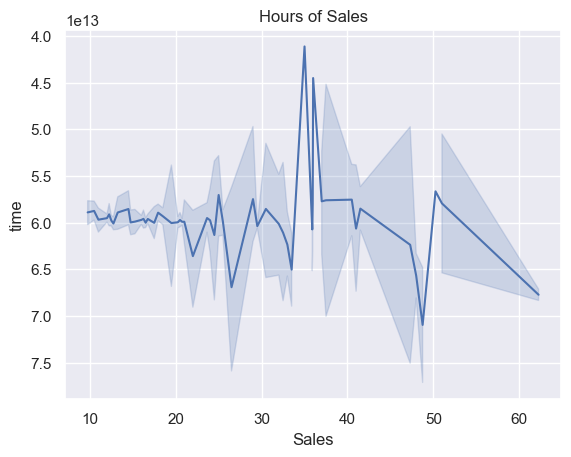

In [92]:
sns.lineplot(data=peak_hours_of_sales, x="Sales", y="time")
plt.title("Hours of Sales")

plt.show()

In [93]:
# The Peak hours of sales in in the eveningtime which is when consumers close from their work for the day.

### 7. The total sales made on each day of the week. Day of the week when sales are made the most

In [94]:
data["Sales_day"] = data["date"].dt.day_name()

In [95]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients,Sales,Sales_day
0,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday
1,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,Thursday
2,3,five_cheese_l,1,2015-01-01,0 days 12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,Thursday
3,4,ital_supr_l,1,2015-01-01,0 days 12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,Thursday
4,5,mexicana_m,1,2015-01-01,0 days 12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,Thursday


In [96]:
Daily_sales = data.groupby("Sales_day")["Sales"].sum().reset_index() #The total sales made on each day of the week
order =[3, 1, 5, 6, 4, 0, 2, ]
Daily_sales_sorted = Daily_sales.loc[order]
Daily_sales_sorted

,Sales_day,Sales
3,Sunday,44146.50
1,Monday,46479.90
5,Tuesday,50002.30
6,Wednesday,50910.90
4,Thursday,54586.95
0,Friday,59735.00
2,Saturday,53367.00


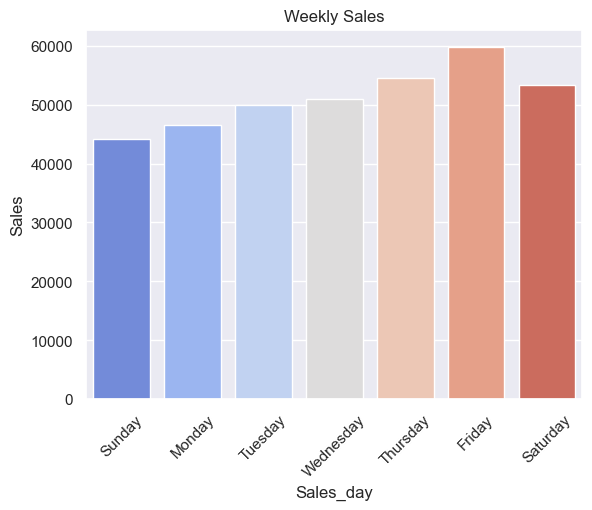

In [97]:
sns.barplot(data=Daily_sales_sorted, x="Sales_day", y="Sales", palette="coolwarm")
plt.title("Weekly Sales")
plt.xticks(rotation=45)

plt.show()

In [98]:
# The day of the week when sales are made in a larger quantity is on Friday. 
# This is possible due to the following reasons; 
# 1. Most people receive their salaries or paycheck on Friday, 
# 2. Customers often shop on Fridays to prepare for the weekend, and also 
# 3. Consumers tend to feel more relaxed and optimistic on Fridays, making them more willing to spend compared to weekdays.

### 8. The five top best selling pizza

In [99]:
Top_five_selling_pizza = data.groupby("name")["Sales"].sum().reset_index()

Top_five_selling_pizza.sort_values("Sales", ascending=False, inplace=True)

Top_five_selling_pizza.head() 

,name,Sales
0,The Barbecue Chicken Pizza,19710.50
30,The Thai Chicken Pizza,18325.00
4,The California Chicken Pizza,18004.75
7,The Classic Deluxe Pizza,16253.00
26,The Spicy Italian Pizza,15300.75


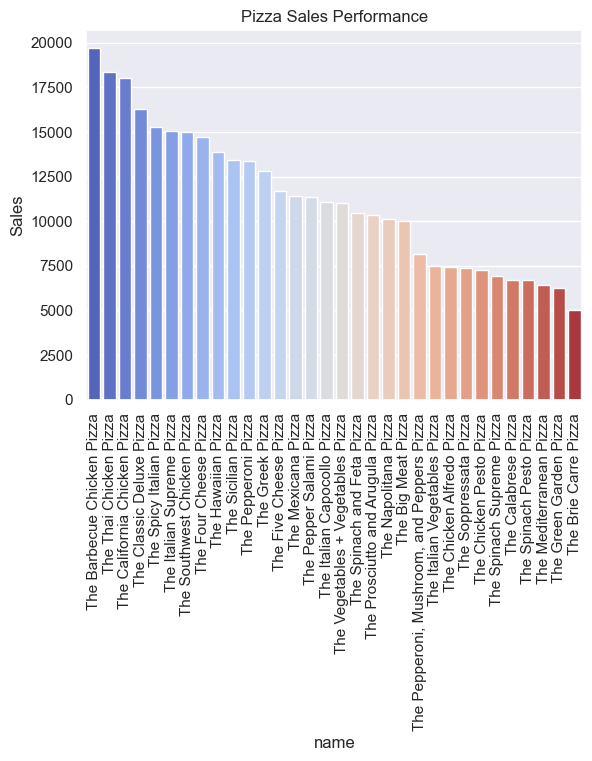

<Figure size 1200x500 with 0 Axes>

In [100]:
sns.barplot(data=Top_five_selling_pizza, x= "name", y="Sales", palette="coolwarm")
plt.title("Pizza Sales Performance")
plt.xticks(rotation=90)
plt.figure(figsize=(12, 5))
plt.show()

In [101]:
#These are the top five best selling pizzas:
#1. The Barbecue Chicken Pizza	19710.50
#2.	The Thai Chicken Pizza	18325.00
#3.	The California Chicken Pizza	18004.75
#4. The Classic Deluxe Pizza	16253.00
#5. The Spicy Italian Pizza	15300.75

### 9. Monthly Sales

In [102]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients,Sales,Sales_day
0,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday
1,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,Thursday
2,3,five_cheese_l,1,2015-01-01,0 days 12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,Thursday
3,4,ital_supr_l,1,2015-01-01,0 days 12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,Thursday
4,5,mexicana_m,1,2015-01-01,0 days 12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,Thursday


In [103]:
data["Month"] = data["date"].dt.month_name()

In [104]:
data.head()

,order_details_id,pizza_id,quantity,date,time,size,price,name,category,ingredients,Sales,Sales_day,Month
0,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday,January
1,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,Thursday,January
2,3,five_cheese_l,1,2015-01-01,0 days 12:12:28,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,Thursday,January
3,4,ital_supr_l,1,2015-01-01,0 days 12:16:31,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,Thursday,January
4,5,mexicana_m,1,2015-01-01,0 days 12:21:30,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,Thursday,January


In [105]:
data["Month"].value_counts()

Month
July         1935
May          1853
January      1845
August       1841
March        1840
April        1799
November     1792
June         1773
February     1685
December     1680
September    1661
October      1646
Name: count, dtype: int64

In [106]:
Monthly_Sales = data.groupby("Month")["Sales"].sum().reset_index()

Monthly_Sales.sort_values("Sales", ascending=False, inplace=True)
order =[4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]
Monthly_Sales_sorted = Monthly_Sales.loc[order]
Monthly_Sales_sorted #Sales made in each month

,Month,Sales
4,January,31196.75
3,February,27979.80
7,March,30899.35
0,April,30183.00
8,May,31260.55
6,June,29715.35
5,July,32480.60
1,August,31234.60
11,September,28016.45
10,October,27502.60


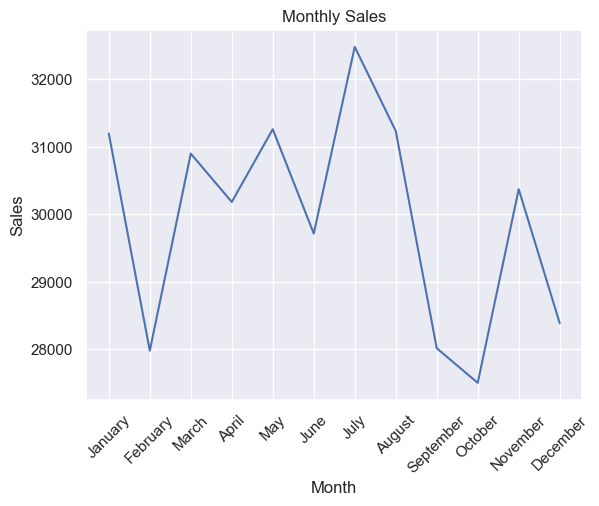

In [107]:

sns.lineplot(data=Monthly_Sales_sorted, x="Month", y="Sales")
plt.title("Monthly Sales")
plt.xticks(rotation=45)


plt.show()

In [108]:
#The trend noticeable is the Mid-Year high sales compared to the falling sales made at the beginning and ending of the year. 
# It neans that sales are influenced by weather and holidays possibly occuring then. 

### 10. Pizza that are not doing well on the Menu

In [109]:
Low_performance_pizza = data.groupby("name")["Sales"].sum().reset_index()

Low_performance_pizza.sort_values("Sales", ascending=False, inplace=True)
 

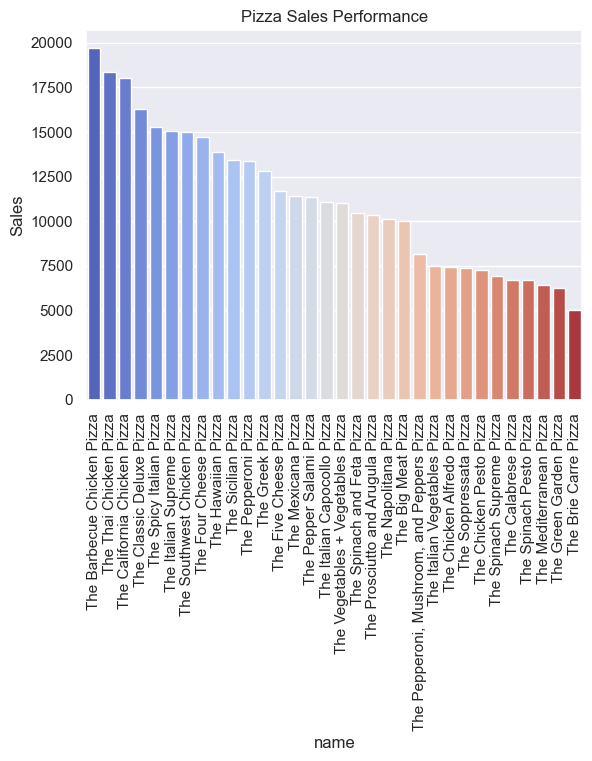

<Figure size 1200x500 with 0 Axes>

In [110]:
sns.barplot(data=Low_performance_pizza, x="name", y="Sales", palette="coolwarm")
plt.title("Pizza Sales Performance")
plt.xticks(rotation=90)
plt.figure(figsize=(12, 5))


plt.show()

In [111]:
# Since there are 31 types of pizzas, the less sold pizzas should be in the second average. (.tail(15)) is used to get the low selling pizzas from the below. 

Low_performance_pizza.tail(15)

,name,Sales
29,The Spinach and Feta Pizza,10462.00
22,The Prosciutto and Arugula Pizza,10326.75
18,The Napolitana Pizza,10141.50
1,The Big Meat Pizza,9996.00
21,"The Pepperoni, Mushroom, and Peppers Pizza",8164.00
15,The Italian Vegetables Pizza,7507.75
5,The Chicken Alfredo Pizza,7420.00
24,The Soppressata Pizza,7385.75
6,The Chicken Pesto Pizza,7259.75
28,The Spinach Supreme Pizza,6938.75
